This notebook will help you get started solving the given problem. In this challenge, we have to predict the attack type. 

In [225]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 1000)
import gc

In [226]:
def concat(data1,data2):
    return pd.concat([pd.DataFrame(data1),pd.DataFrame(data2)],1)

In [227]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [228]:
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 169307 rows and 43 columns
The test data has 91166 rows and 42 columns


In [229]:
## check target class
train['target'].value_counts(normalize=True)

0    0.583957
2    0.217676
1    0.198367
Name: target, dtype: float64

In [230]:
target = train['target']

In [231]:
def get_features(tmp):
    return [x for x in tmp.columns if x not in ['connection_id','target']]

In [232]:
def free():
    return gc.collect()

In [233]:
def plot_(tmp,an=True):
    plt.figure(figsize=(15,10))
    sns.heatmap(data=tmp.corr(),annot=an)
    plt.show()

In [234]:
#print(train.corr()['target'])

There aren't any missing values. Let's jump to building models to get some baseline score.

In [235]:
## check missing values
#train.isnull().sum(axis=0) ## there are no missing values.

In [236]:
pca=PCA(n_components=2,svd_solver='full',random_state=1996)

In [237]:
pca.fit(train[get_features(train)])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=1996,
  svd_solver='full', tol=0.0, whiten=False)

In [238]:
print(sum(pca.explained_variance_ratio_))

0.999820606401


In [239]:
pca_tr_early=pca.transform(train[get_features(train)])

In [240]:
pca_ts_early=pca.transform(test[get_features(test)])

In [241]:
pca_tr_early=pd.DataFrame(pca_tr_early,columns=['pca'+str(i) for i in range(2)])
pca_ts_early=pd.DataFrame(pca_ts_early,columns=['pca'+str(i) for i in range(2)])

In [242]:
print(pca_tr_early.shape,pca_ts_early.shape)

(169307, 2) (91166, 2)


In [243]:
free()

1395

In [244]:
print(pca_tr_early.head(),pca_ts_early.head())

         pca0        pca1
0  -82.257726 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980          pca0         pca1
0 -480.055638  5365.433597
1 -593.625489  -721.622468
2  -82.257726  -747.057980
3  -82.257613  -747.057448
4  -82.257726  -747.057980


# Preprocessing after Visualization

In [245]:
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns
train=train.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18'],1)
test=test.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18'],1)

CAT_10 And CAT_13 Analysis

In [246]:
print(train[['cat_10','cat_13']].corr())
print(test[['cat_10','cat_13']].corr())

#below transformation gives perfect correlation map as it is not correlated with others
print(train['cat_13'].head(),train['cat_10'].head())
print(max(train['cat_10']),min(train['cat_13']),min(train['cat_10']),max(train['cat_13']))
print(max(test['cat_10']),min(test['cat_13']),min(test['cat_10']),max(test['cat_13']))

train['cat_10_13_max']=[max(i,j) for i,j in zip(train['cat_10'],train['cat_13'])]
test['cat_10_13_max']=[max(i,j) for i,j in zip(test['cat_10'],test['cat_13'])]
train['cat_10_13_min']=[min(i,j) for i,j in zip(train['cat_10'],train['cat_13'])]
test['cat_10_13_min']=[min(i,j) for i,j in zip(test['cat_10'],test['cat_13'])]

# plt.figure(figsize=(15,10))
# sns.heatmap(data=train.corr(),annot=True)
# plt.show()

print(train[['cat_10_13_max','cat_10_13_min','target']].corr())


#choose cat_10_13_max 

train=train.drop(['cat_10_13_min','cat_10','cat_13'],1)
test=test.drop(['cat_10_13_min','cat_10','cat_13'],1)

          cat_10    cat_13
cat_10  1.000000  0.993754
cat_13  0.993754  1.000000
          cat_10    cat_13
cat_10  1.000000  0.998468
cat_13  0.998468  1.000000
0    0
1    0
2    0
3    0
4    0
Name: cat_13, dtype: int64 0    0
1    0
2    0
3    0
4    0
Name: cat_10, dtype: int64
435 0 0 480
884 0 0 993
               cat_10_13_max  cat_10_13_min    target
cat_10_13_max       1.000000       0.993927  0.003078
cat_10_13_min       0.993927       1.000000  0.001874
target              0.003078       0.001874  1.000000


In [247]:
#cat_4,cat_5,cat_6,cat_7,cat_15,cat_16

Analyze cont_17, cont_18  , we have found that its transformation to mean of both only correlates with cont_6 and cont_7
So, we will go with accepting this instead cont_6,cont_7 problem

In [248]:
free()

279

In [249]:
train['cont_17_18_mean']=[(i+j)/2 for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_mean']=[(i+j)/2 for i,j in zip(test['cont_17'],test['cont_18'])]

train['cont_17_18_min']=[min(i,j) for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_min']=[min(i,j) for i,j in zip(test['cont_17'],test['cont_18'])]

# plt.figure(figsize=(15,10))
# sns.heatmap(data=train.corr(),annot=False)
# plt.show()

print(train[['cont_17_18_min','cont_17_18_mean','target']].corr())

#Try Keeping both min and min coulmn still both are correalted

train=train.drop(['cont_17','cont_18'],1)
test=test.drop(['cont_17','cont_18'],1)

                 cont_17_18_min  cont_17_18_mean    target
cont_17_18_min         1.000000         0.996754 -0.003298
cont_17_18_mean        0.996754         1.000000 -0.001513
target                -0.003298        -0.001513  1.000000


# Analyzing cont_6 and cont_7 

In [250]:
train['cont_4_5_max']=[max(i,j) for i,j in zip(train['cont_4'],train['cont_5'])]
train['cont_6_7_min']=[min(i,j) for i,j in zip(train['cont_6'],train['cont_7'])]
train['cont_15_16_min']=[min(i,j) for i,j in zip(train['cont_15'],train['cont_16'])]
train['cont_15_16_min']=train['cont_14']*2 + np.exp(train['cont_15_16_min'])

test['cont_4_5_max']=[max(i,j) for i,j in zip(test['cont_4'],test['cont_5'])]
test['cont_6_7_min']=[min(i,j) for i,j in zip(test['cont_6'],test['cont_7'])]
test['cont_15_16_min']=[min(i,j) for i,j in zip(test['cont_15'],test['cont_16'])]
test['cont_15_16_min']=test['cont_14']*2 + np.exp(test['cont_15_16_min'])

In [251]:
#choose min due to high corr
train=train.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)
test=test.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)

In [252]:
print(train.shape,test.shape)

(169307, 29) (91166, 28)


PCA

In [253]:
pca_2_tr=pca.fit_transform(train[get_features(train)])
pca_2_ts=pca.transform(test[get_features(test)])

In [254]:
pca_2_tr=pd.DataFrame(pca_2_tr,columns=['pca_2_1','pca_2_2'])
pca_2_ts=pd.DataFrame(pca_2_ts,columns=['pca_2_1','pca_2_2'])

In [255]:
print(pca_2_tr.head(),pca_2_ts.shape)

      pca_2_1     pca_2_2
0  -82.257727 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980 (91166, 2)


In [256]:
free()

234

In [257]:
print(pca_tr_early.head(),pca_ts_early.head())

         pca0        pca1
0  -82.257726 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980          pca0         pca1
0 -480.055638  5365.433597
1 -593.625489  -721.622468
2  -82.257726  -747.057980
3  -82.257613  -747.057448
4  -82.257726  -747.057980


In [258]:
#plot_(pd.DataFrame(pd.concat([pca_tr_early,pca_2_tr],1)),False)
print(pd.DataFrame(pd.concat([pca_tr_early,pca_2_tr],1)).corr())

                 pca0          pca1       pca_2_1       pca_2_2
pca0     1.000000e+00  8.885425e-15  1.000000e+00  5.122785e-14
pca1     8.885425e-15  1.000000e+00 -3.805405e-14  1.000000e+00
pca_2_1  1.000000e+00 -3.805405e-14  1.000000e+00  4.216871e-15
pca_2_2  5.122785e-14  1.000000e+00  4.216871e-15  1.000000e+00


In [259]:
print(pca_tr_early.head(),pca_2_tr.head())

         pca0        pca1
0  -82.257726 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980       pca_2_1     pca_2_2
0  -82.257727 -747.057980
1 -593.625489 -721.622468
2  -82.257726 -747.057980
3  -82.257726 -747.057980
4  -82.257726 -747.057980


In [260]:
# plot_(train)

In [261]:
train=train.drop(['cont_17_18_min'],1)
test=test.drop(['cont_17_18_min'],1)

In [262]:
# train=pd.concat([train,pca_tr_early],1)
# test=pd.concat([test,pca_ts_early],1)

In [263]:
# plot_(train[get_features(train)])

In [264]:
print(train.columns,train.shape,test.shape,test.columns)

Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21',
       'cat_22', 'cat_23', 'target', 'cat_10_13_max', 'cont_17_18_mean',
       'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min'],
      dtype='object') (169307, 28) (91166, 27) Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21',
       'cat_22', 'cat_23', 'cat_10_13_max', 'cont_17_18_mean', 'cont_4_5_max',
       'cont_6_7_min', 'cont_15_16_min'],
      dtype='object')


In [265]:
pca_last_tr=pca.fit_transform(pd.concat([train[get_features(train)],pca_2_tr,pca_tr_early],1))

In [266]:
pca_last_ts=pca.transform(pd.concat([test[get_features(test)],pca_2_ts,pca_ts_early],1))

In [267]:
pca_last_tr=pd.DataFrame(pca_last_tr,columns=['pca_'+str(i) for i in range(2)])
pca_last_ts=pd.DataFrame(pca_last_ts,columns=['pca_'+str(i) for i in range(2)])

In [268]:
print(pca_last_tr.head(),pca_last_ts.head())

         pca_0        pca_1
0  -142.474562 -1293.942378
1 -1028.189500 -1249.886779
2  -142.474562 -1293.942377
3  -142.474562 -1293.942378
4  -142.474562 -1293.942378          pca_0        pca_1
0  -831.480755  9293.203594
1 -1028.189508 -1249.886779
2  -142.474562 -1293.942378
3  -142.474366 -1293.941457
4  -142.474562 -1293.942378


In [269]:
train=pd.concat([train,pca_last_tr],1)
test=pd.concat([test,pca_last_ts],1)

In [270]:
# plot_(train[get_features(train)])
# plot_(test[get_features(test)])

In [271]:
print(train.shape,test.shape,train.columns,test.columns)

(169307, 30) (91166, 29) Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21',
       'cat_22', 'cat_23', 'target', 'cat_10_13_max', 'cont_17_18_mean',
       'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min', 'pca_0', 'pca_1'],
      dtype='object') Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21',
       'cat_22', 'cat_23', 'cat_10_13_max', 'cont_17_18_mean', 'cont_4_5_max',
       'cont_6_7_min', 'cont_15_16_min', 'pca_0', 'pca_1'],
      dtype='object')


In [272]:
free()

199

In [273]:
# train=train.drop(['cat_17'],1)
# test=test.drop(['cat_17'],1)

In [274]:
train[get_features(train)].columns

Index(['cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9', 'cont_10', 'cont_11',
       'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2', 'cat_3', 'cat_9',
       'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21', 'cat_22', 'cat_23',
       'cat_10_13_max', 'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min',
       'cont_15_16_min', 'pca_0', 'pca_1'],
      dtype='object')

In [275]:
train[get_features(train)].shape

(169307, 28)

# CONT variable clustering

In [276]:
# from sklearn.cluster import MiniBatchKMeans
# coords = np.vstack((train[['cont_1', 'cont_2']].values,
#                     train[['cont_3', 'cont_8']].values,
#                    train[['cont_9', 'cont_10']].values,
#                    train[['cont_11', 'cont_12']].values,
#                    train[['cont_13', 'cont_14']].values))
# sample_ind = np.random.permutation(len(coords))
# kmeans = MiniBatchKMeans(n_clusters=5, batch_size=10000).fit(coords[sample_ind])
# train.loc[:, 'cont_1_2_cluster'] = kmeans.predict(train[['cont_1', 'cont_2']])
# train.loc[:, 'cont_3_8_cluster'] = kmeans.predict(train[['cont_3', 'cont_8']])
# train.loc[:, 'cont_9_10_cluster'] = kmeans.predict(train[['cont_9', 'cont_10']])
# train.loc[:, 'cont_11_12_cluster'] = kmeans.predict(train[['cont_11', 'cont_12']])
# train.loc[:, 'cont_13_14_cluster'] = kmeans.predict(train[['cont_13', 'cont_14']])

# test.loc[:, 'cont_1_2_cluster'] = kmeans.predict(test[['cont_1', 'cont_2']])
# test.loc[:, 'cont_3_8_cluster'] = kmeans.predict(test[['cont_3', 'cont_8']])
# test.loc[:, 'cont_9_10_cluster'] = kmeans.predict(test[['cont_9', 'cont_10']])
# test.loc[:, 'cont_11_12_cluster'] = kmeans.predict(test[['cont_11', 'cont_12']])
# test.loc[:, 'cont_13_14_cluster'] = kmeans.predict(test[['cont_13', 'cont_14']])

In [277]:
print(get_features(train))

['cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2', 'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'cat_10_13_max', 'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min', 'pca_0', 'pca_1']


In [278]:
# plot_(train)
# plot_(test)

# CAT variable clustering

In [279]:
print(train.shape,train.columns)

(169307, 30) Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21',
       'cat_22', 'cat_23', 'target', 'cat_10_13_max', 'cont_17_18_mean',
       'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min', 'pca_0', 'pca_1'],
      dtype='object')


In [280]:
#since cat_1 and cat_21 are highly (0.96) correlated to each other, so chose cat_22 and cat_23
# coords = np.vstack((train[['cat_1', 'cont_2']].values,
#                     train[['cat_3', 'cat_9']].values,
#                    train[['cat_14', 'cat_16']].values,
#                    train[['cat_19', 'cat_20']].values,
#                    train[['cat_22', 'cat_23']].values))
# sample_ind = np.random.permutation(len(coords))
# kmeans = MiniBatchKMeans(n_clusters=11, batch_size=10000).fit(coords[sample_ind])
# train.loc[:, 'cat_1_2_cluster'] = kmeans.predict(train[['cat_1', 'cont_2']])
# train.loc[:, 'cat_3_9_cluster'] = kmeans.predict(train[['cat_3', 'cont_9']])
# train.loc[:, 'cat_14_16_cluster'] = kmeans.predict(train[['cat_14', 'cat_16']])
# train.loc[:,'cat_19_20_cluster'] = kmeans.predict(train[['cat_19', 'cat_20']])
# train.loc[:,'cat_22_23_cluster'] = kmeans.predict(train[['cat_22', 'cat_23']])

# test.loc[:, 'cat_1_2_cluster'] = kmeans.predict(test[['cat_1', 'cat_2']])
# test.loc[:, 'cat_3_9_cluster'] = kmeans.predict(test[['cat_3', 'cat_9']])
# test.loc[:, 'cat_14_16_cluster'] = kmeans.predict(test[['cat_14', 'cat_16']])
# test.loc[:, 'cat_19_20_cluster'] = kmeans.predict(test[['cat_19', 'cat_20']])
# test.loc[:, 'cat_22_23_cluster'] = kmeans.predict(test[['cat_22', 'cat_23']])

In [281]:
# plot_(train)
# plot_(test)

In [282]:
print(get_features(train))
print(get_features(test))

['cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2', 'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'cat_10_13_max', 'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min', 'pca_0', 'pca_1']
['cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2', 'cat_3', 'cat_9', 'cat_14', 'cat_16', 'cat_19', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'cat_10_13_max', 'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min', 'pca_0', 'pca_1']


In [283]:
len(get_features(train))

28

In [60]:
import seaborn as sns

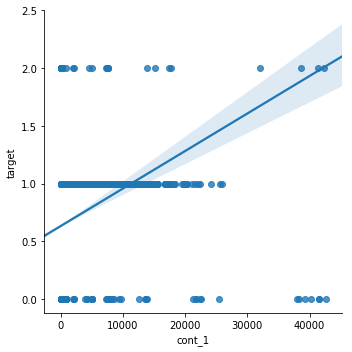

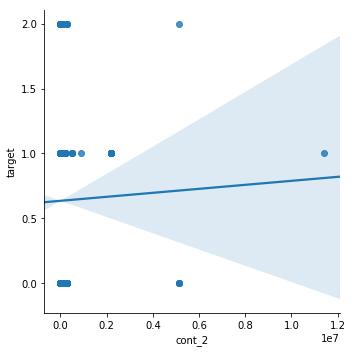

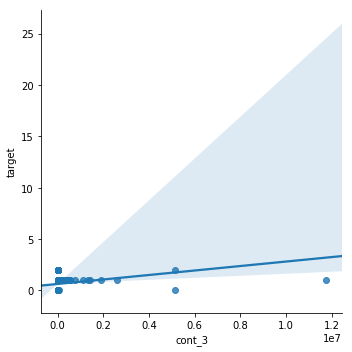

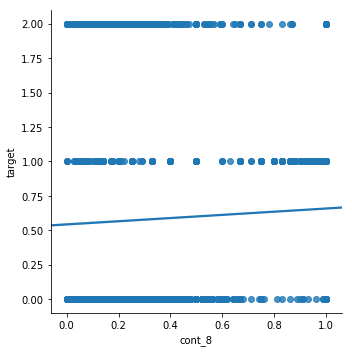

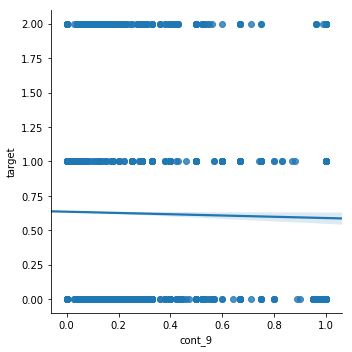

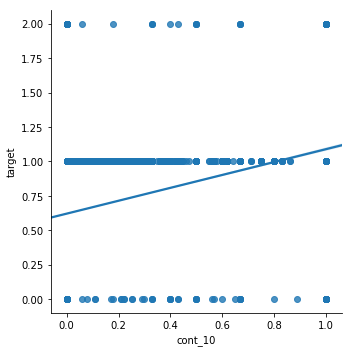

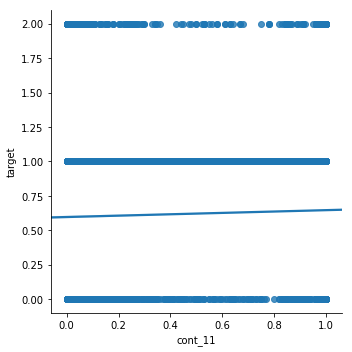

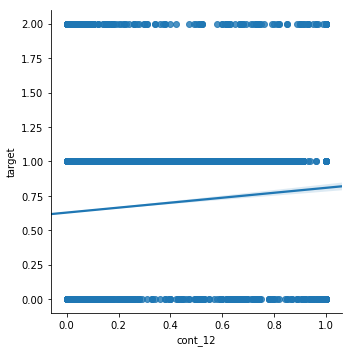

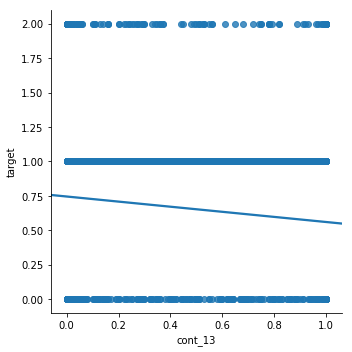

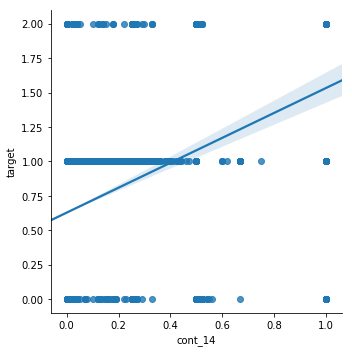

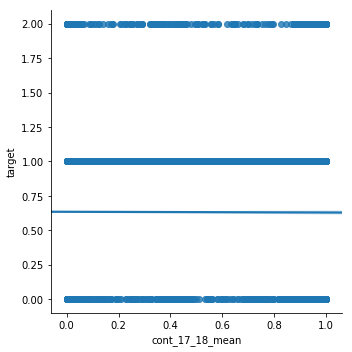

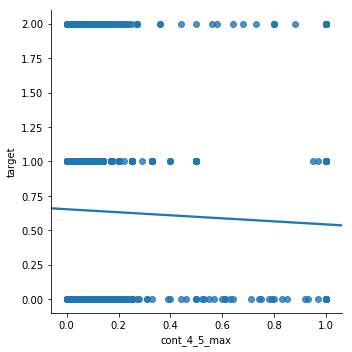

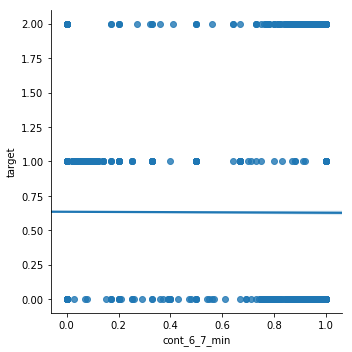

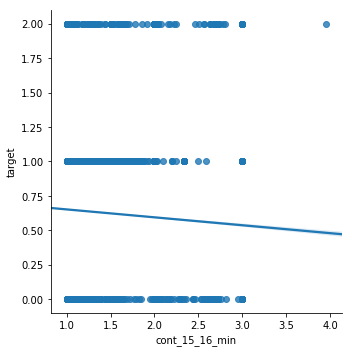

In [62]:
for i in train.columns:
    if 'cont' in i:
        sns.lmplot(x=i,y='target',data=train)
        plt.show()

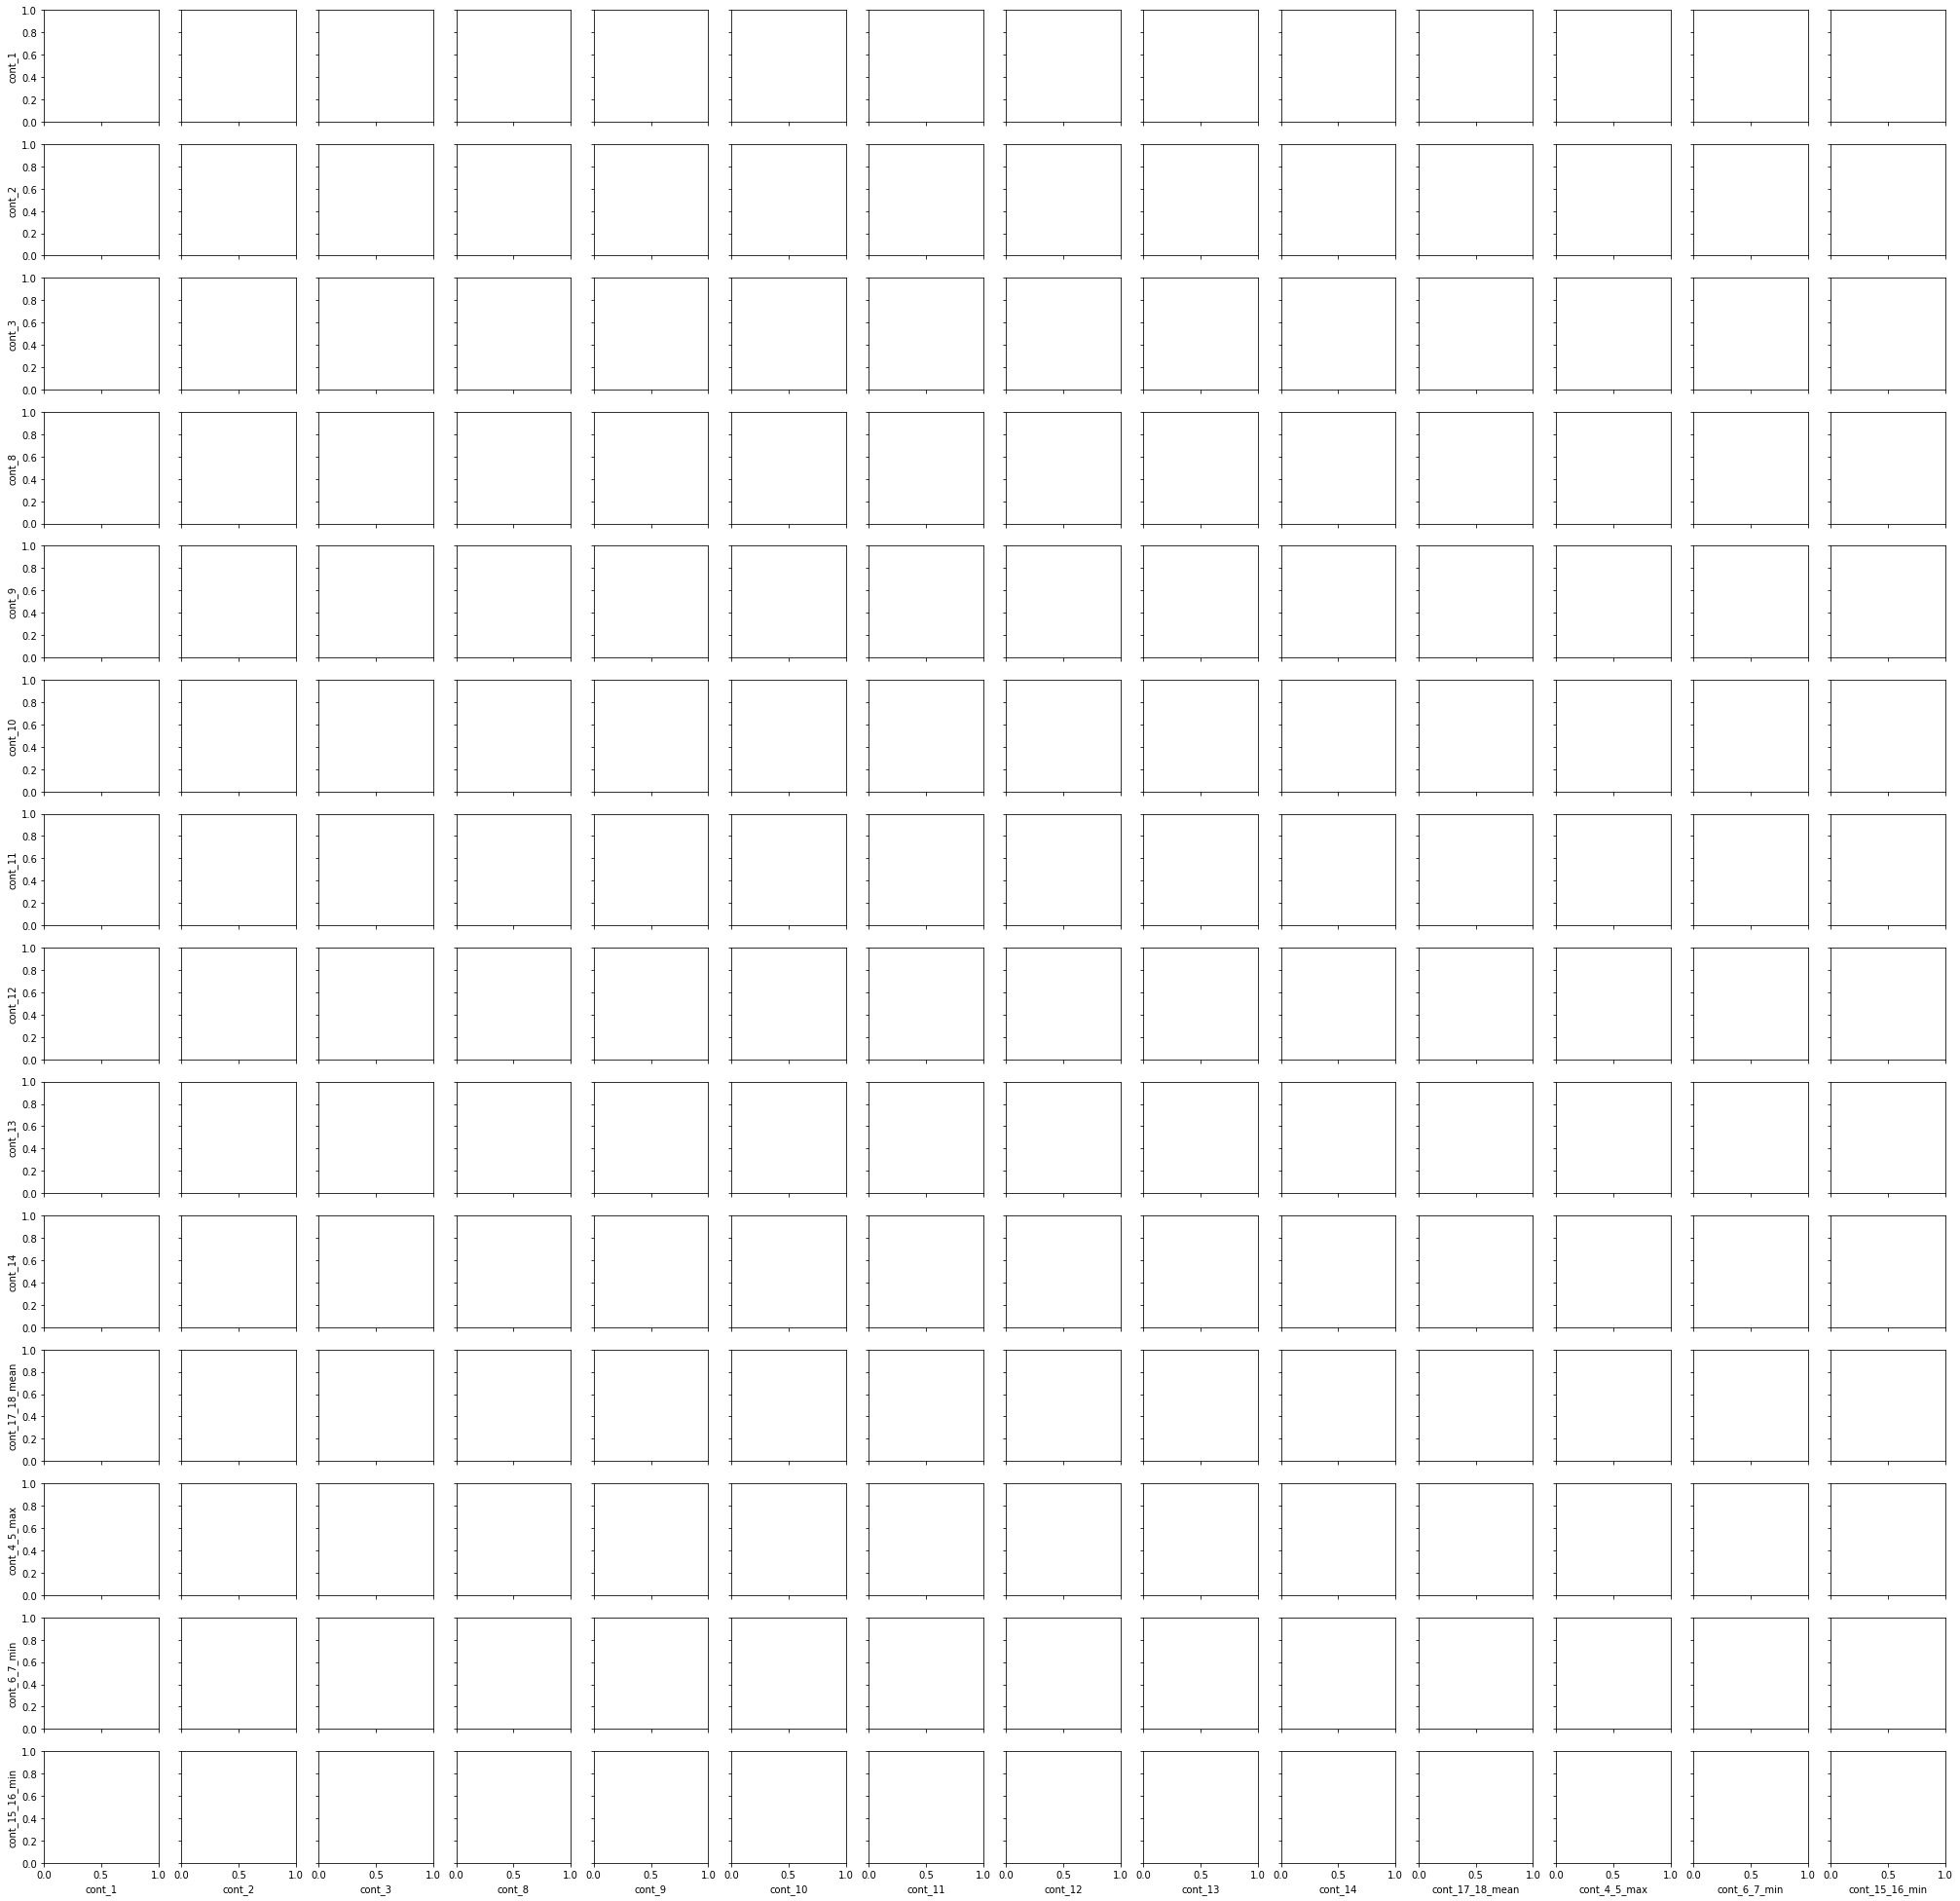

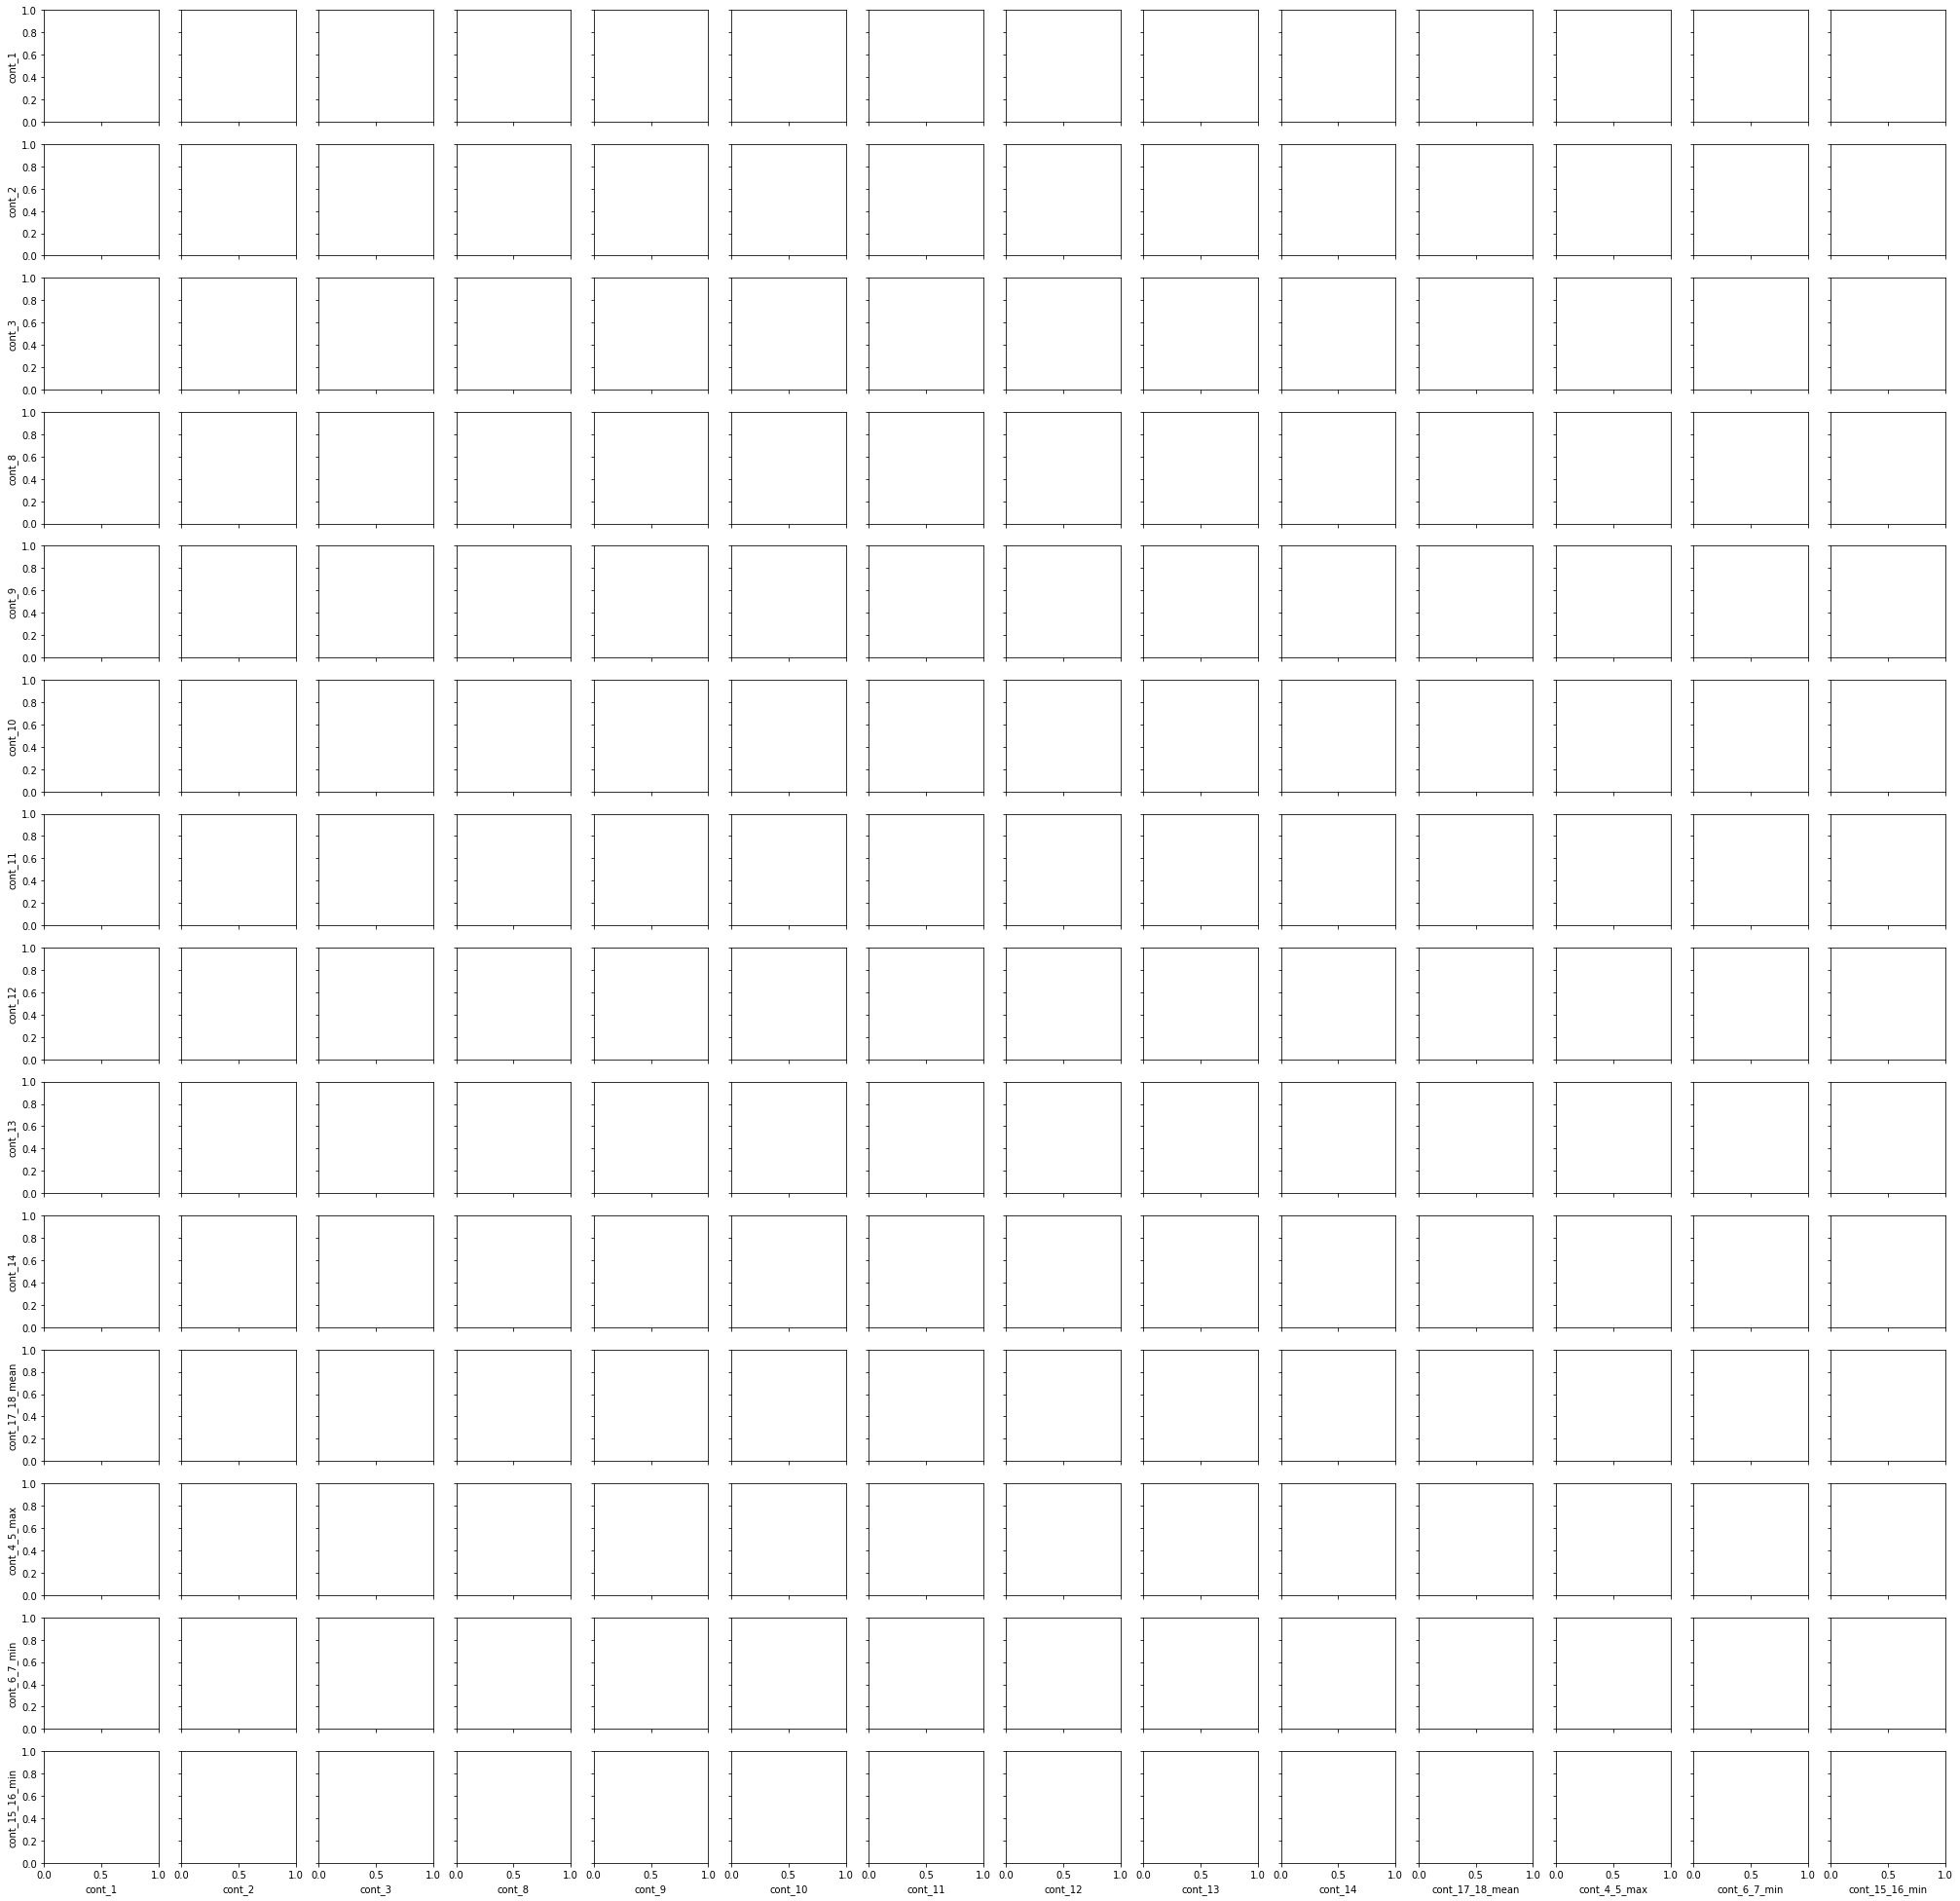

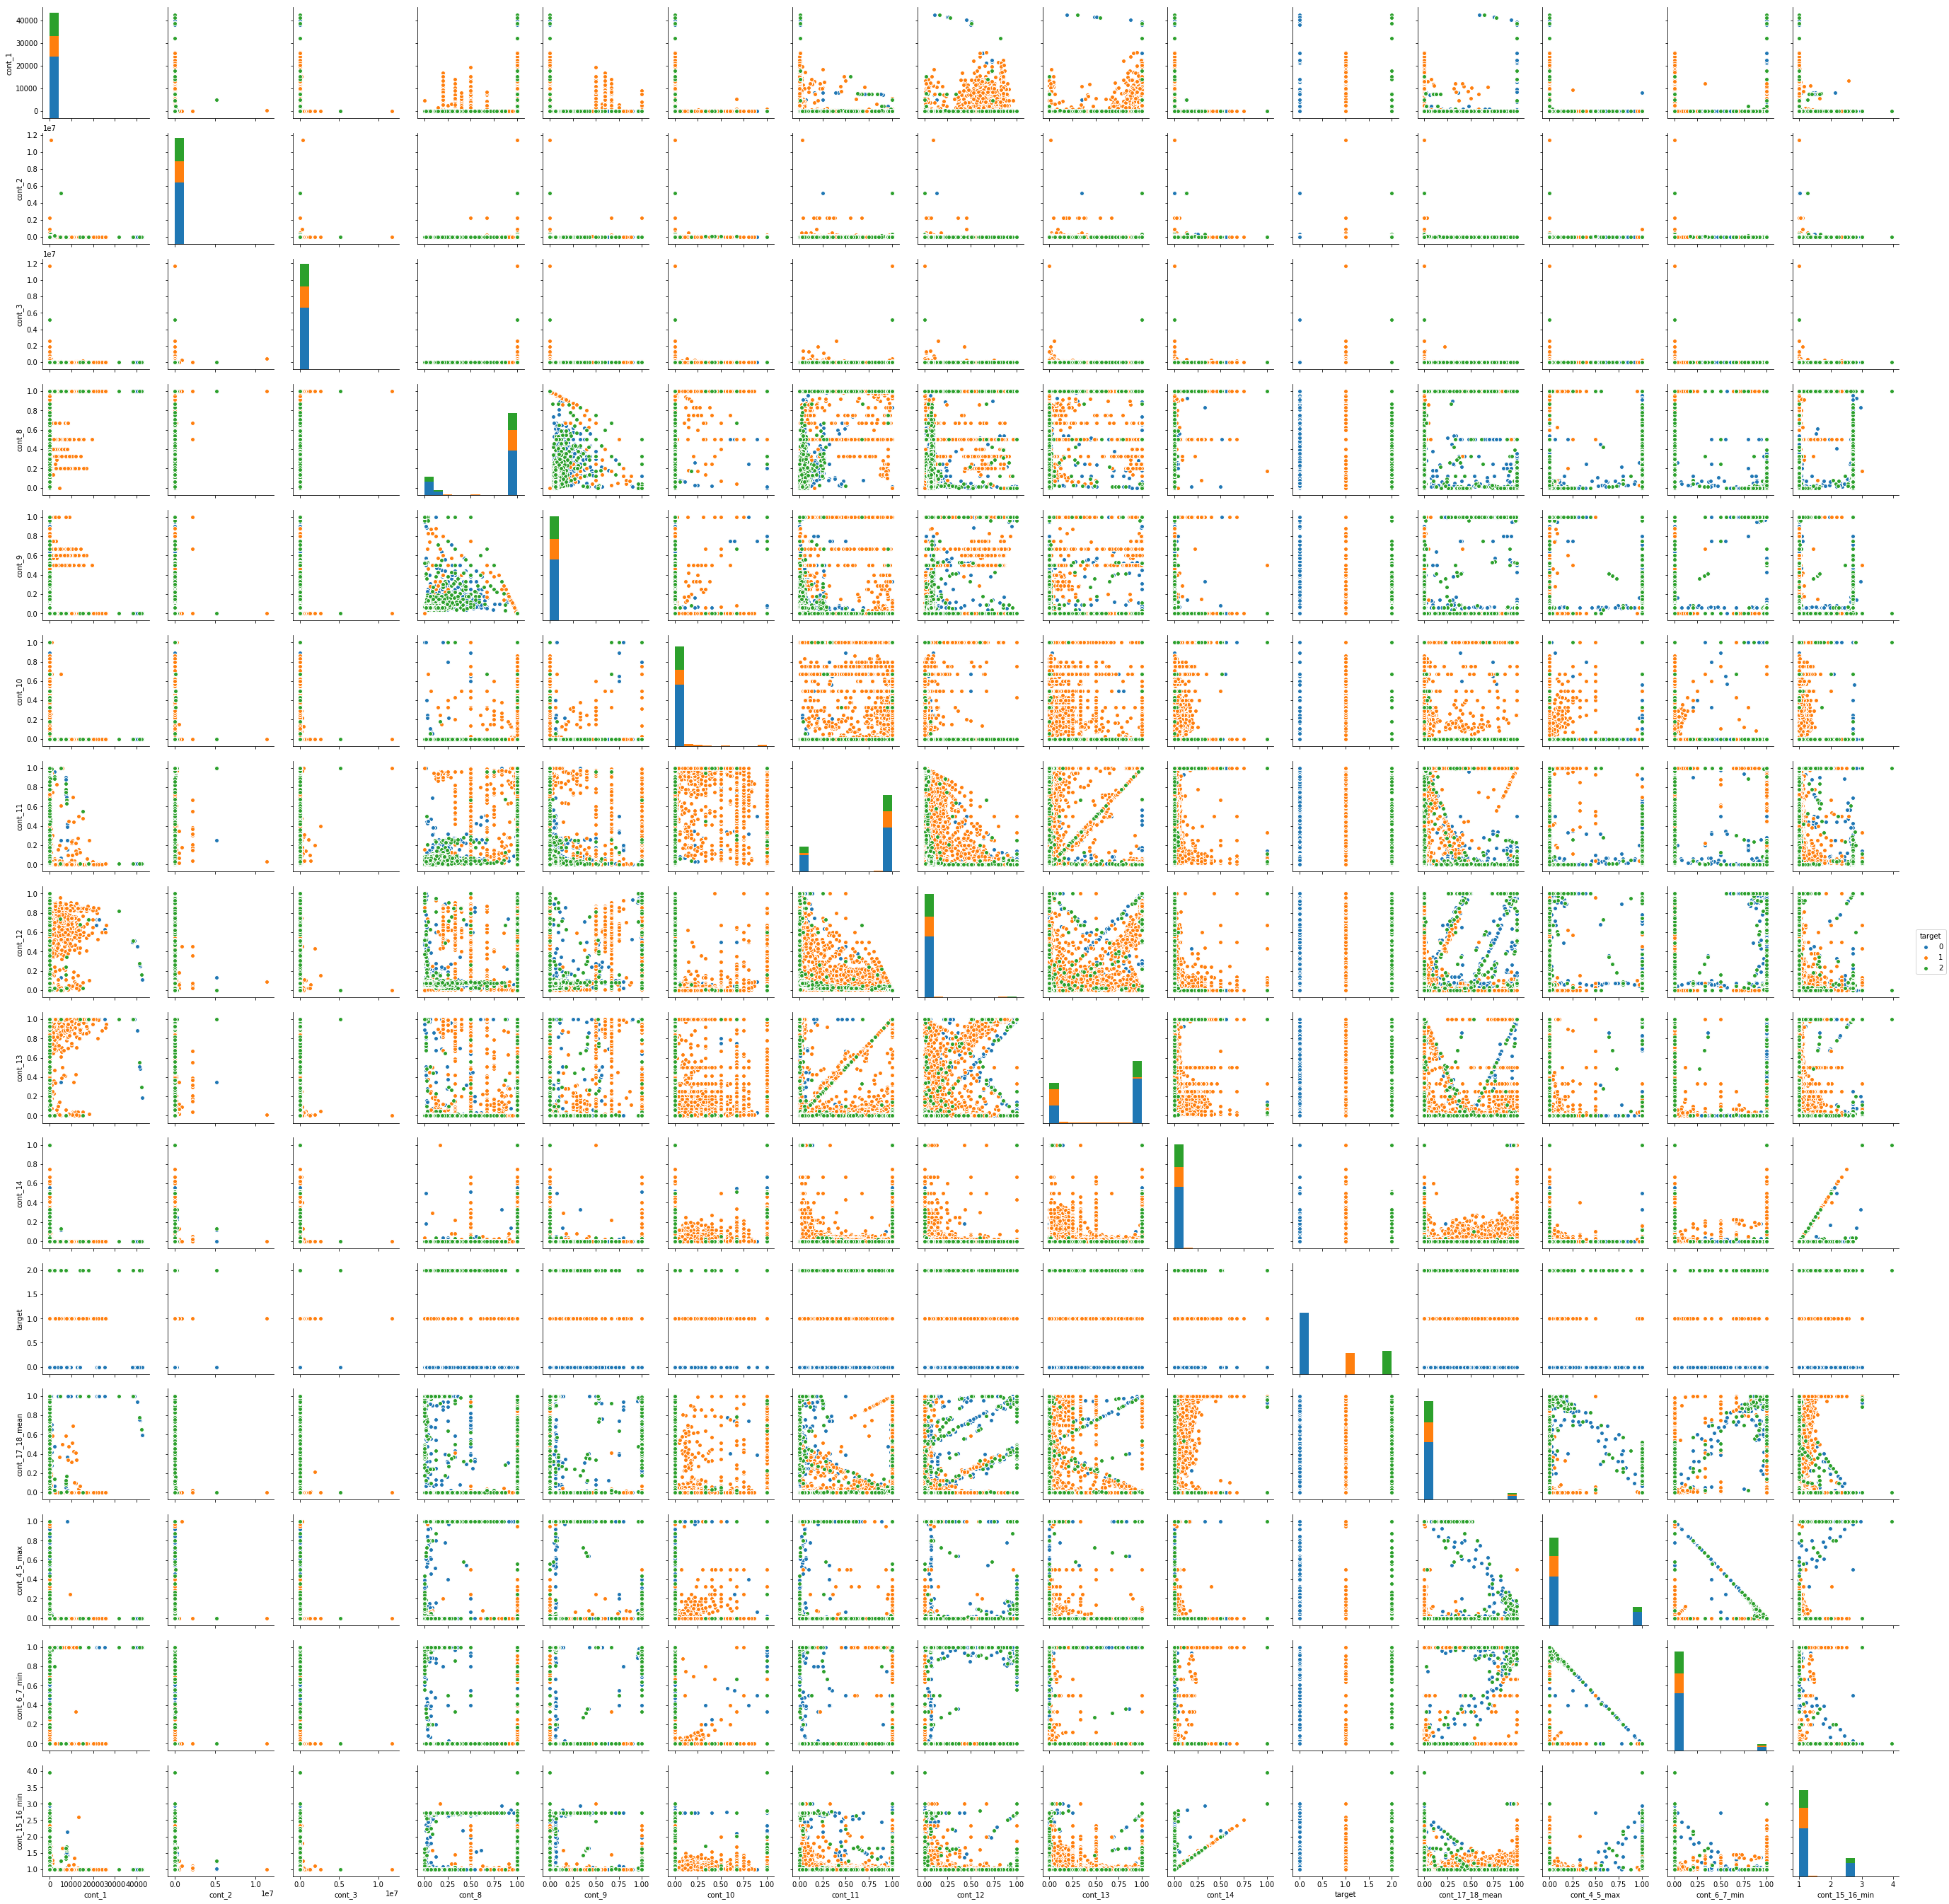

In [68]:
sns.pairplot(train[[i for i in train.columns if 'cont' in i or 'target' in i]],hue='target')
plt.show()

# MODEL XGB

In [299]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [201]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, train_size = 0.8, stratify = target, random_state = 1996)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [256]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [257]:
# default parameters
params_ = {}
params_['objective'] = 'multi:softmax'
params_['eta'] = 0.2
params_['silent'] = True
params_['max_depth'] = 10
params_['subsample'] = 0.9
params_['colsample_bytree'] = 0.9
params_['nthread']=-1
params_['num_class']=3
params_['booster']='gbtree'
params_['lambda']=.8
params_['min_child_weight']=20
'''
{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
'''

"\n{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,\n            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,\n            'eval_metric': 'rmse', 'objective': 'reg:linear'}\n"

In [303]:
# default parameters
params = {}
params['objective'] = 'multi:softmax'
params['eta'] = 0.02
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9
params['nthread']=-1
params['num_class']=3

In [304]:
# dtrain = xgb.DMatrix(data=train[get_features(train)], label=target)
dtrain = xgb.DMatrix(data=X_train[get_features(train)], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[get_features(train)], label=y_valid)
dtest = xgb.DMatrix(data=test[get_features(test)])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [281]:
free()

17992

In [299]:
clf1_1 = xgb.train(params, dtrain, 1150)

In [293]:
clf1_2 = xgb.train(params, dtrain, 20000, watchlist, maximize=True, verbose_eval=50, early_stopping_rounds=390, feval=multAcc)

[0]	train-maccuracy:0.77867	eval-maccuracy:0.778306
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 390 rounds.
[50]	train-maccuracy:0.778877	eval-maccuracy:0.778306
[100]	train-maccuracy:0.778914	eval-maccuracy:0.778336
[150]	train-maccuracy:0.779999	eval-maccuracy:0.779901
[200]	train-maccuracy:0.780095	eval-maccuracy:0.780048
[250]	train-maccuracy:0.78042	eval-maccuracy:0.780373
[300]	train-maccuracy:0.780752	eval-maccuracy:0.780669
[350]	train-maccuracy:0.780789	eval-maccuracy:0.780669
[400]	train-maccuracy:0.780937	eval-maccuracy:0.780669
[450]	train-maccuracy:0.780996	eval-maccuracy:0.780728
[500]	train-maccuracy:0.781048	eval-maccuracy:0.780787
[550]	train-maccuracy:0.781166	eval-maccuracy:0.780787
[600]	train-maccuracy:0.781232	eval-maccuracy:0.780787
[650]	train-maccuracy:0.781291	eval-maccuracy:0.780846
[700]	train-maccuracy:0.781328	eval-maccuracy:0.780875
[750]	train-maccuracy:0.78

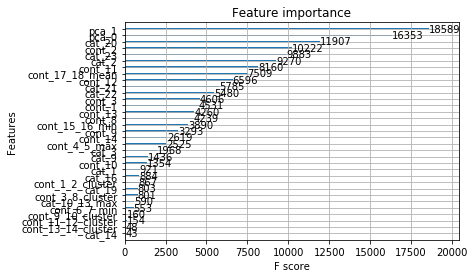

In [294]:
xgb.plot_importance(booster=clf1_2)
plt.show()

In [300]:
sub=pd.read_csv('test_data.csv')

In [301]:
pred = clf1_2.predict(dtest)

In [302]:
## make submission
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub[['connection_id','target']].to_csv('XGB_07_NOV_78.cluster_.01_380iter.csv', index=False)

In [289]:
import pickle
pickle.dump(clf1_1,open('XGB_07_NOV_78.3799_.01_380iter.sav','wb'))

In [290]:
free()

70

### Model 2 - Decision Tree

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [93]:
## set up model
clf2 = DecisionTreeClassifier(max_depth=9, min_samples_split=7)

In [94]:
clf2.fit(X_train[get_features(train)],y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
print(accuracy_score(y_valid,clf2.predict(X_valid[get_features(train)])))

0.780166558384


In [42]:
## train model
clf2.fit(train[feature_names], target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
## make prediction
pred2 = clf2.predict(test[feature_names])

In [47]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred2
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub2.csv', index=False)

### Model 3 - Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
clf3 = LogisticRegression(C=0.01,n_jobs=-1,solver='sag')

In [98]:
clf3.fit(X_train[get_features(train)],y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
clf3.fit(train[feature_names], target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
print(accuracy_score(y_valid,clf3.predict(X_valid[get_features(train)])))

0.665672435178


In [49]:
print(accuracy_score(y_valid,clf3.predict(X_valid[feature_names])))

0.731705156222


In [52]:
pred3 = clf3.predict(test[feature_names])

In [53]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub3_Logistic.csv', index=False)

# MODEL 4 - NaiveBayes Classifier

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
from sklearn.preprocessing import StandardScaler

In [118]:
x_tr=StandardScaler().fit_transform(X_train[feature_names])
x_ts=StandardScaler().fit_transform(X_valid[feature_names])

In [103]:
clf4=GaussianNB()

In [104]:
clf4.fit(X_train[get_features(train)],y_train)

GaussianNB(priors=None)

In [105]:
print(accuracy_score(y_valid,clf4.predict(X_valid[get_features(train)])))

0.751373220719


In [122]:
clf4.fit(train[feature_names], target)

GaussianNB(priors=None)

In [124]:
pred3 = clf4.predict(test[feature_names])

In [125]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub5_NaiveBayes.csv', index=False)

# Model 5 : -    RandomForest

In [266]:
from sklearn.ensemble import RandomForestClassifier

In [267]:
clf=RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=2,
                           min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features=None, 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=True, n_jobs=-1, random_state=1996, verbose=0,
                           warm_start=False, class_weight=None)

In [268]:
clf.fit(X_train[get_features(train)],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=1996, verbose=0, warm_start=False)

In [269]:
print(accuracy_score(y_valid,clf.predict(X_valid[get_features(train)])))

0.780255153269


In [347]:
clf.fit(train[feature_names], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=-1,
            oob_score=True, random_state=1996, verbose=0, warm_start=False)

In [348]:
pred3 = clf.predict(test[feature_names])

In [349]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub4_Random_f_2.csv', index=False)

# Model 6 : KNeighbors

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
for i in [7,9,11,13,15,17,23,25,27,29,31,33,35,37,39,41,43,45]:
    clf6=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    clf6.fit(X_train[get_features(train)],y_train)
    print('At i = ',i,' -  Score : ',accuracy_score(y_valid,clf6.predict(X_valid[get_features(train)])))

At i =  7  -  Score :  0.767999527494
At i =  9  -  Score :  0.77207489221
At i =  11  -  Score :  0.773581005257
At i =  13  -  Score :  0.773905853169
At i =  15  -  Score :  0.775559624358
At i =  17  -  Score :  0.776475104837
At i =  23  -  Score :  0.778896698364
At i =  25  -  Score :  0.778896698364
At i =  27  -  Score :  0.779162483019
At i =  29  -  Score :  0.779310141161
At i =  31  -  Score :  0.779280609533
At i =  33  -  Score :  0.77933967279
At i =  35  -  Score :  0.779398736046
At i =  37  -  Score :  0.779192014648
At i =  39  -  Score :  0.779014824877
At i =  41  -  Score :  0.779014824877
At i =  43  -  Score :  0.778985293249
At i =  45  -  Score :  0.779014824877


In [142]:
clf6=KNeighborsClassifier(n_neighbors=21,n_jobs=-1)

In [143]:
clf6.fit(X_train[get_features(train)],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=21, p=2,
           weights='uniform')

In [144]:
print(accuracy_score(y_valid,clf6.predict(X_valid[get_features(train)])))

0.777744964857


# Neural Network Model

In [120]:
print(train.shape,test.shape)

(169307, 31) (91166, 30)


In [131]:
x=train[get_features(train)].values
y=train['target'].values

In [132]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
y=ohe.fit_transform(y.reshape(-1,1))

In [133]:
y=y.toarray()

In [134]:
y

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [116]:
import keras

Using TensorFlow backend.


In [119]:
from keras.models import Sequential
from keras.layers import Dense

In [136]:
model=Sequential()
model.add(Dense(30, input_dim=29, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [137]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [139]:
#model.fit(x, y,epochs=200,batch_size=10)

# Catboost Model 

In [286]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression


# LightGBM Model

In [287]:
from lightgbm import LGBMClassifier

In [321]:
# LightGBM params
lgb_params = {}
lgb_params['learning_rate'] = 0.02
lgb_params['n_estimators'] = 650
lgb_params['max_bin'] = 255
lgb_params['subsample'] = 0.9
lgb_params['subsample_freq'] = 10
lgb_params['colsample_bytree'] = 0.9 
lgb_params['min_child_samples'] = 500
lgb_params['seed'] = 1996
lgb_params['objective']='multiclass'
lgb_params['metric']='multi_error'
lgb_params['num_class'] = 3

lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3   
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] = 2
lgb_params2['num_leaves'] = 16
lgb_params2['seed'] = 99
lgb_params2['objective']='multiclass'
lgb_params2['metric']='multi_error'
lgb_params2['num_class'] = 3


lgb_params3 = {}
lgb_params3['n_estimators'] = 1100
lgb_params3['max_depth'] = 4
lgb_params3['learning_rate'] = 0.02
lgb_params3['objective']='multiclass'
lgb_params3['metric']='multi_error'
lgb_params3['seed'] = 99
lgb_params['num_class'] = 3


In [322]:
lgb_model = LGBMClassifier(**lgb_params)

lgb_model2 = LGBMClassifier(**lgb_params2)

lgb_model3 = LGBMClassifier(**lgb_params3)

In [323]:
lgb_model.fit(X_train[get_features(train)].values,y_train)

LGBMClassifier(boosting_type='gbdt', colsample_bytree=0.9,
        learning_rate=0.015, max_bin=255, max_depth=-1,
        metric='multi_error', min_child_samples=500, min_child_weight=5,
        min_split_gain=0.0, n_estimators=700, n_jobs=-1, num_class=3,
        num_leaves=31, objective='multiclass', random_state=1996,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.9,
        subsample_for_bin=50000, subsample_freq=6)

In [324]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid,lgb_model.predict(X_valid[get_features(train)].values)))

0.780816254208


# XGBoost sklearn wrapper

In [335]:
'''
# default parameters
params = {}
params['objective'] = 'multi:softmax'
params['eta'] = 0.02
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9
params['nthread']=-1
params['num_class']=3
'''


import xgboost as xgb
xgb_clf1=xgb.XGBClassifier(max_depth=6, learning_rate=0.02, n_estimators=400, silent=False, 
                          objective='multi:softmax', nthread=-1, 
                          gamma=0, min_child_weight=1, max_delta_step=0, subsample=.9, colsample_bytree=.9, 
                          colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, 
                          seed=1996, missing=None)
xgb_clf2=xgb.XGBClassifier(max_depth=7, learning_rate=0.015, n_estimators=600, silent=False, 
                          objective='multi:softmax', nthread=-1, 
                          gamma=0, min_child_weight=1, max_delta_step=0, subsample=.9, colsample_bytree=.9, 
                          colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, 
                          seed=20354, missing=None)
xgb_clf3=xgb.XGBClassifier(max_depth=6, learning_rate=0.025, n_estimators=320, silent=False, 
                          objective='multi:softmax', nthread=-1, 
                          gamma=0, min_child_weight=1, max_delta_step=0, subsample=.9, colsample_bytree=.9, 
                          colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, 
                          seed=46468, missing=None)


In [331]:
xgb_clf.fit(X_train[get_features(train)],y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1996, silent=False, subsample=0.9)

In [332]:
print(accuracy_score(y_valid,xgb_clf.predict(X_valid[get_features(train)])))

0.780904849093


# Stacking

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingClassifier

In [ ]:
meta=LogisticRegression()

In [338]:
Stacked_clf=StackingClassifier(classifiers=[xgb_clf1,xgb_clf2,xgb_clf3],meta_classifier=meta,use_probas=False)
from sklearn.cross_validation import cross_val_score

In [339]:
Stacked_clf.fit(train[get_features(train)],train['target'])


StackingClassifier(average_probas=False,
          classifiers=[XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='multi:softmax', reg_alpha=0, reg_lambda=1,
       scale_po...ax', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=46468, silent=False, subsample=0.9)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          use_features_in_secondary=False, use_probas=False, verbose=0)

In [340]:
pred3 = Stacked_clf.predict(test[get_features(test)])

In [341]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('Stacked_2.csv', index=False)

In [342]:
import pickle
pickle.dump(Stacked_clf,open('Stacked_2.sav','wb'))

In [304]:
Stacked_clf.fit(train[get_features(train)],train['target'])
# score=cross_val_score(Stacked_clf,train[get_features(train)],train['target'],cv=5,scoring='accuracy')
# print(score)
# print(score.mean(),' ',score.std())

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please us

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please us

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:282: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please us

[ 0.78105251  0.78046187  0.78031422  0.78048492  0.78030124]
0.780522952498   0.000275075216418
